In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import tensorflow as tf

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [15]:
class_names = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

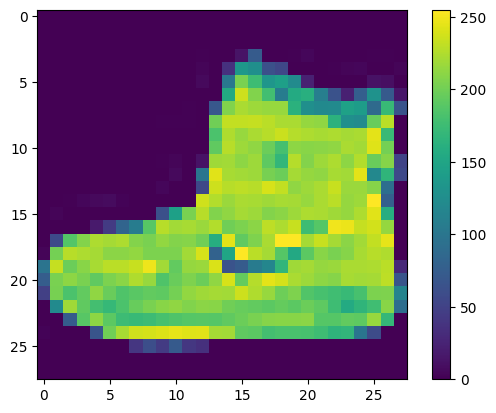

In [16]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [17]:
x_train = x_train / 255
x_test = x_test / 255

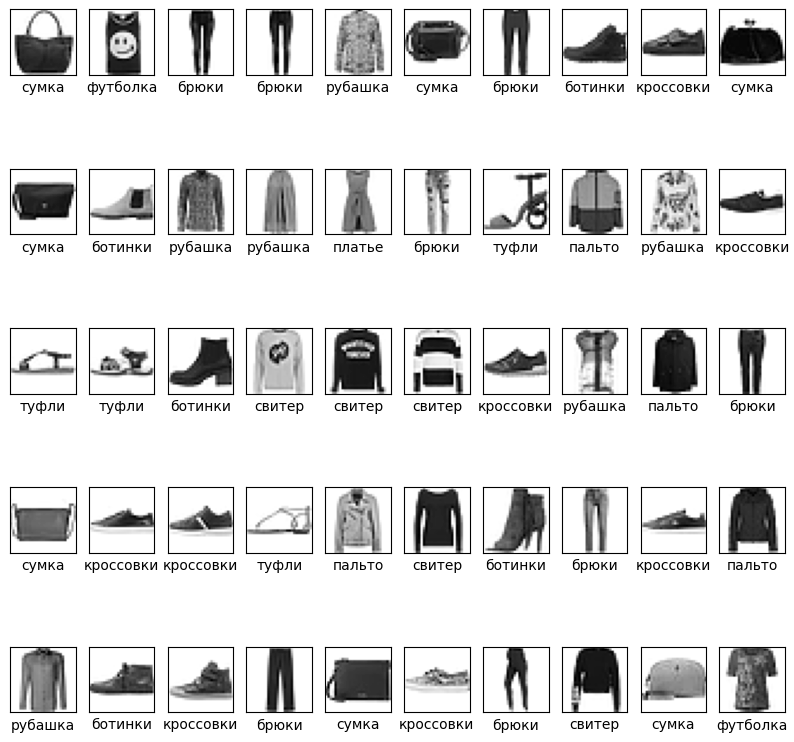

In [19]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [20]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100


1875/1875 [==============================] - 4s 1ms/step - loss: 0.7433 - accuracy: 0.7607
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5103 - accuracy: 0.8263
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4665 - accuracy: 0.8385
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4417 - accuracy: 0.8464
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4254 - accuracy: 0.8518
Epoch 6/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.8568
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4005 - accuracy: 0.8608
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8637
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3833 - accuracy: 0.8659
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step -

In [28]:
x_train[0].shape

(28, 28)

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3257 - accuracy: 0.8846
Accuracy: 0.8845999836921692


In [27]:
tf.saved_model.save(model, 'FashionCNN')

INFO:tensorflow:Assets written to: FashionCNN\assets


INFO:tensorflow:Assets written to: FashionCNN\assets
